In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [99]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [100]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [102]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA

#### What is the distribution of age among heart failure patients in the dataset?

In [103]:
labels = ["40 - 50","50 - 60","60 - 70","70 - 80","80 - 90","90 - 100"]
bins = [40,49,59,69,79,89,100]

df['Age_Group'] = pd.cut(df['age'],bins = bins, labels = labels)

In [104]:
age_distribution = df['Age_Group'].value_counts().reset_index()
age_distribution

,index,Age_Group
0,60 - 70,93
1,50 - 60,82
2,70 - 80,52
3,40 - 50,40
4,80 - 90,19
5,90 - 100,6


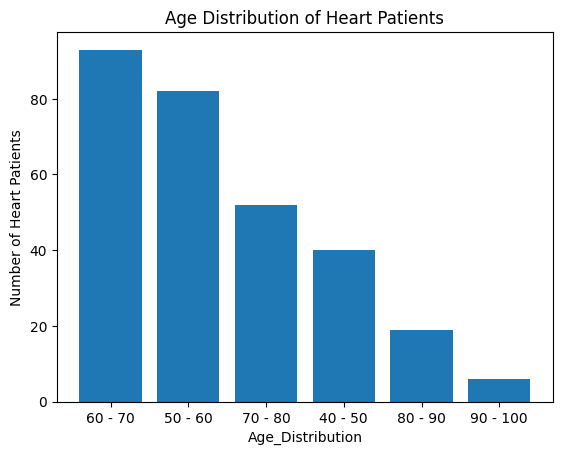

In [105]:
plt.bar(age_distribution['index'],age_distribution['Age_Group'])
plt.title('Age Distribution of Heart Patients')
plt.xlabel("Age_Distribution")
plt.ylabel('Number of Heart Patients')
plt.show()

#### How does the death rate vary with age

In [106]:
death_rate = df.groupby(['Age_Group'],as_index = False)[['DEATH_EVENT']].sum()
death_rate

,Age_Group,DEATH_EVENT
0,40 - 50,11
1,50 - 60,20
2,60 - 70,27
3,70 - 80,20
4,80 - 90,13
5,90 - 100,5


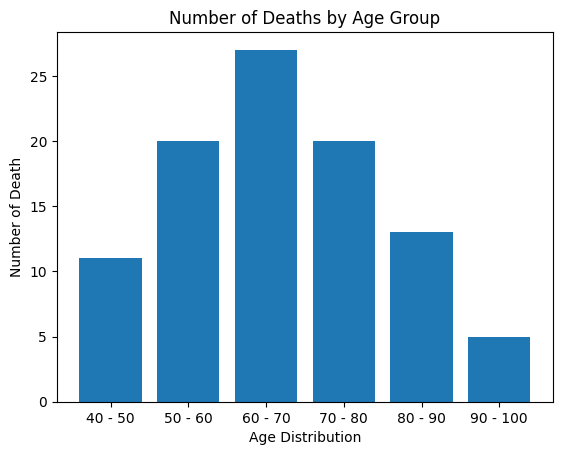

In [107]:
plt.bar(death_rate['Age_Group'],death_rate['DEATH_EVENT'])
plt.title('Number of Deaths by Age Group')
plt.xlabel("Age Distribution")
plt.ylabel('Number of Death')
plt.show()

#### What is the percentage of male and female patients in the dataset?

In [108]:
gender_partition = round(df[['sex']].value_counts(normalize=True) * 100,2).reset_index()
gender_partition.columns = ['Sex','Percent']

In [109]:
gender_partition['Sex'] = gender_partition['Sex'].apply(lambda a:'Male' if a == 1 else "Female")

In [110]:
gender_partition

,Sex,Percent
0,Male,64.88
1,Female,35.12


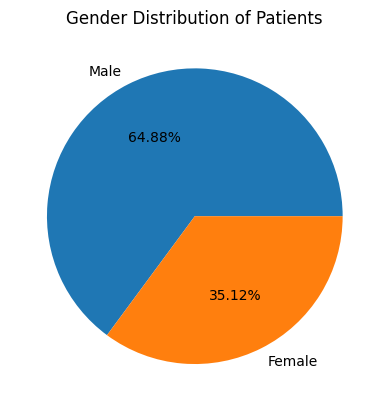

In [111]:
plt.pie(gender_partition['Percent'],labels = gender_partition['Sex'],autopct = "%.2f%%")
plt.title('Gender Distribution of Patients')
plt.show()

Female : - 35.12%

Male :- 64.88%

## How does the platelet count vary among different age groups?

In [113]:
df.groupby(['Age_Group'])[['platelets']].describe()

platelets                                                    \
              count           mean            std       min       25%   
Age_Group                                                               
40 - 50        40.0  290044.753750  152782.390306   87000.0  214500.0   
50 - 60        82.0  265001.807073   83484.172827   70000.0  218250.0   
60 - 70        93.0  248990.840645   76019.870854   62000.0  204000.0   
70 - 80        52.0  267036.349038  101173.880709   25100.0  222250.0   
80 - 90        19.0  252248.213684  105430.556160   47000.0  189000.0   
90 - 100        6.0  290059.671667  109798.700540  196000.0  209500.0   

                                              
                  50%          75%       max  
Age_Group                                     
40 - 50    263358.030  352250.0000  850000.0  
50 - 60    263358.030  317750.0000  504000.0  
60 - 70    254000.000  286000.0000  497000.0  
70 - 80    259179.015  296000.0000  621000.0  
80 - 90    243000.000  313500.0000  507000.0  
90 - 100   244679.015  358339.5075  461000.0

In [114]:
avg_platelets = df.groupby(['Age_Group'],as_index = False)[['platelets']].mean()
avg_platelets

,Age_Group,platelets
0,40 - 50,290044.753750
1,50 - 60,265001.807073
2,60 - 70,248990.840645
3,70 - 80,267036.349038
4,80 - 90,252248.213684
5,90 - 100,290059.671667


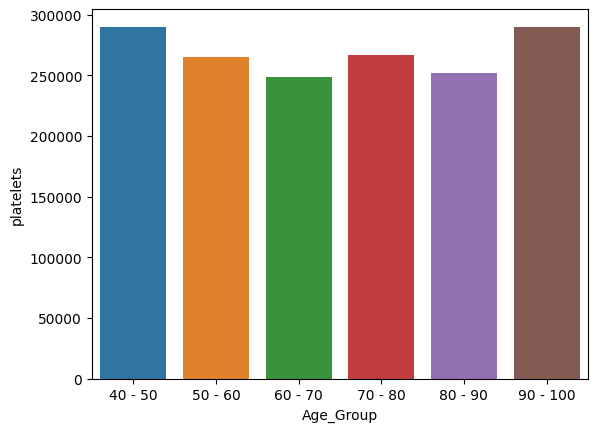

In [133]:
sns.barplot(x = avg_platelets['Age_Group'],y = avg_platelets['platelets'])
plt.show()

## Is there a Correlation between creatinine and sodium levels in the bloods

In [116]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_Group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70 - 80
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50 - 60
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60 - 70
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50 - 60
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60 - 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,60 - 70
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,50 - 60
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,40 - 50
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,40 - 50


In [118]:
creatinine_sodium_correlation = df[['serum_sodium','serum_creatinine']]

In [122]:
creatinine_sodium_correlation.corr()

,serum_sodium,serum_creatinine
serum_sodium,1.000000,-0.189095
serum_creatinine,-0.189095,1.000000


A correlation of -18.9% between creatinine and sodium levels indicates a very weak negative correlation. A correlation close to 0 indicates a weak relationship. In our case, -18.9% correlation between creatinine and sodium levels is very minimal.

## How does the prevalence of high blood pressure differ between male and female patients?

In [251]:
x = df.groupby(['sex'],as_index = False)[['high_blood_pressure']].sum()
y = df.groupby(['sex'],as_index = False)[['high_blood_pressure']].count()

In [254]:
x['total'] = y['high_blood_pressure']

In [255]:
x['percent'] = (x['high_blood_pressure'] / x['total']) * 100

In [261]:
x['sex'] = x['sex'].apply(lambda a :"Female" if a == 0 else "Male")

In [262]:
x

,sex,high_blood_pressure,total,percent
0,Female,44,105,41.904762
1,Male,61,194,31.443299


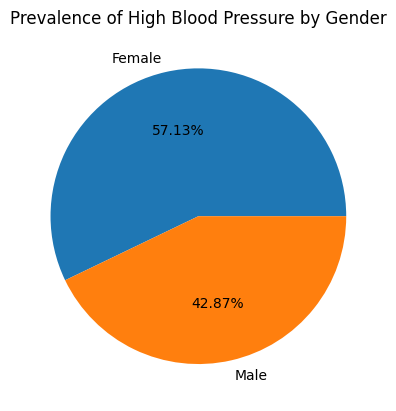

In [266]:
plt.pie(x['percent'],labels = x['sex'],autopct="%0.2f%%")
plt.title('Prevalence of High Blood Pressure by Gender')
plt.show()

## What is the relationship between smoking habits and the occurrence of heart failure?

In [270]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Are there any noticeable patterns in the distribution of death events across different age groups?

In [297]:
df.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64